# Dogs vs Cats Redux
Kaggle competition and first homework assignment from fastai MOOC. 

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
from pathlib import Path

In [3]:
bs = 32

In [4]:
path = Path('../data/dogs-vs-cats-redux-kernels-edition/')
path_train = path/'train'
path_test = path/'test'

In [33]:
data = ImageDataBunch.from_folder(path, train="train", test="test", valid_pct=0.2,
                                  classes=['cat', 'dog'],
                                  ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)

/home/kai/anaconda3/envs/fastai/lib/python3.7/site-packages/fastai/data_block.py:534: UserWarning: You are labelling your items with CategoryList.
Your train set contained the following unknown labels, the corresponding items have been discarded.
test
  if getattr(ds, 'warn', False): warn(ds.warn)
/home/kai/anaconda3/envs/fastai/lib/python3.7/site-packages/fastai/data_block.py:534: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
test
  if getattr(ds, 'warn', False): warn(ds.warn)


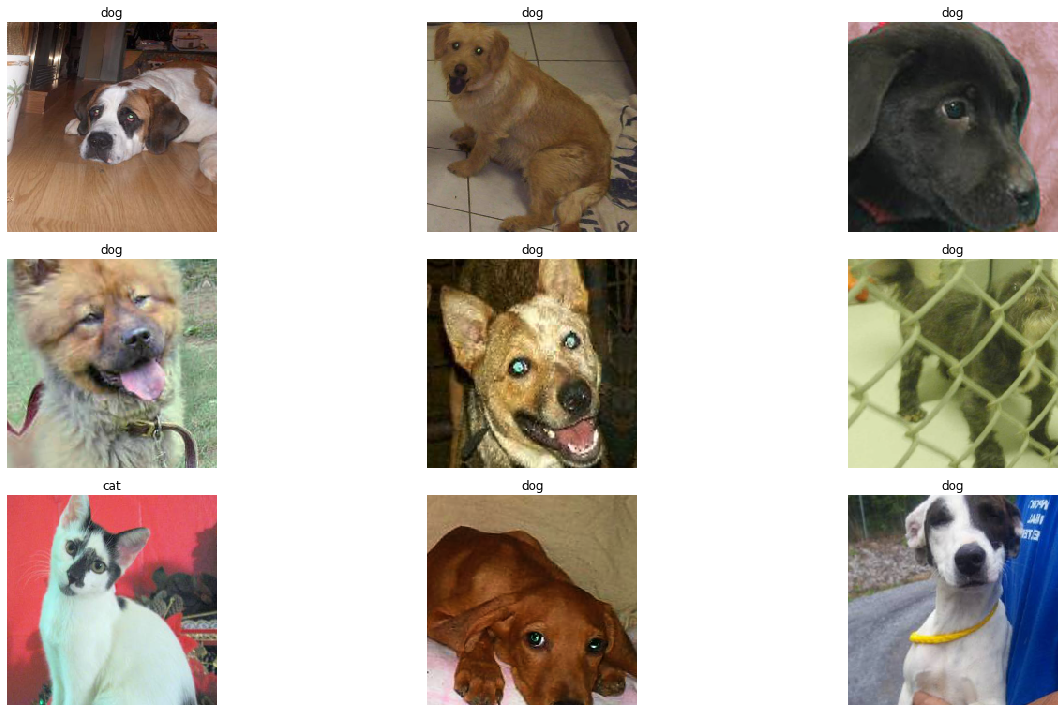

In [34]:
data.show_batch(rows=3, figsize=(20, 10))

In [35]:
print(data.classes)
len(data.classes), data.c

['cat', 'dog']


(2, 2)

In [36]:
data

ImageDataBunch;

Train: LabelList (19956 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dog,dog,dog,dog,dog
Path: ../data/dogs-vs-cats-redux-kernels-edition;

Valid: LabelList (5044 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dog,dog,cat,cat,dog
Path: ../data/dogs-vs-cats-redux-kernels-edition;

Test: LabelList (12500 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: ../data/dogs-vs-cats-redux-kernels-edition

In [37]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy, error_rate])

In [38]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.100300,0.047243,0.983743,0.016257,01:40
1,0.058709,0.031091,0.989492,0.010508,01:35
2,0.046844,0.020063,0.993259,0.006741,01:36
3,0.035849,0.018782,0.992863,0.007137,01:35


In [39]:
learn.save('stage-1')

In [43]:
learn.lr_find(start_lr=1e-5, end_lr=1e-1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


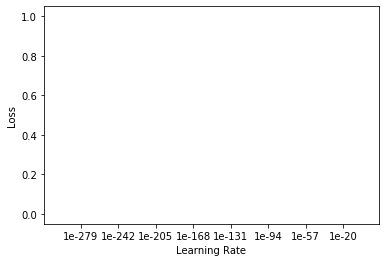

In [44]:
learn.recorder.plot()

In [42]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(3e-3, 1e-2))

In [ ]:
learn.save('stage-1-50')

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-5, 1e-2))

In [45]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (19956 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dog,dog,dog,dog,dog
Path: ../data/dogs-vs-cats-redux-kernels-edition;

Valid: LabelList (5044 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dog,dog,cat,cat,dog
Path: ../data/dogs-vs-cats-redux-kernels-edition;

Test: LabelList (12500 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: ../data/dogs-vs-cats-redux-kernels-edition, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1

In [46]:
interp = ClassificationInterpretation.from_learner(learn)

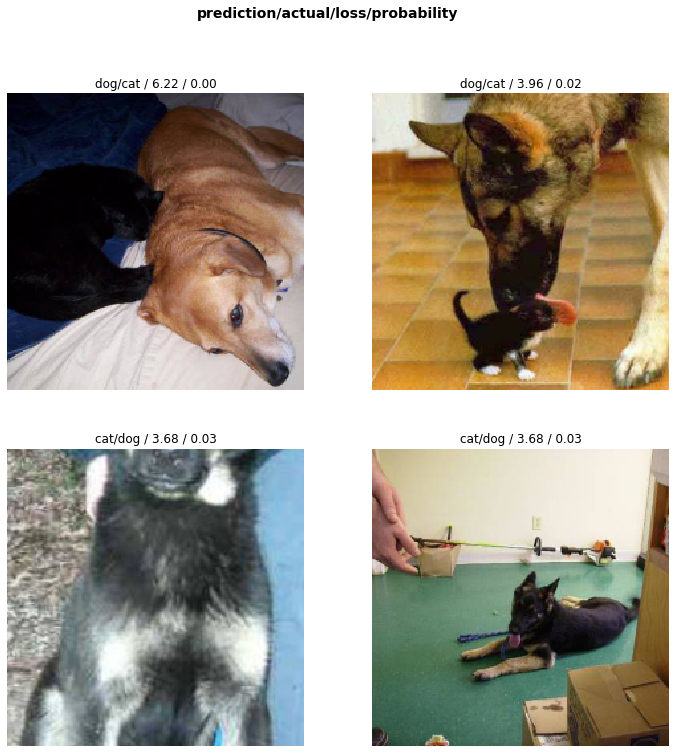

In [47]:
interp.plot_top_losses(4)

In [48]:
interp.most_confused(min_val=2)

[('dog', 'cat', 25), ('cat', 'dog', 11)]

In [105]:
# Since test set has no labels, y ends up with a bunch of zeroes.
preds, y = learn.get_preds(DatasetType.Test)

In [ ]:
len(preds[1])

In [ ]:
np.clip(preds[1][1:10], .05, .98)

In [55]:
print(data.test_ds)

LabelList (12500 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: ../data/dogs-vs-cats-redux-kernels-edition


In [79]:
test_nums = [int(str(i).split('/')[-1][:-4]) for i in data.test_dl.dataset.items]

In [ ]:
labels = np.argmax(preds)

In [103]:
dog_proba = [np.round(np.float(p), 2) for p in (np.clip(preds[:, 1], .02, .98))]

In [ ]:
learn.predict(is_test=True)

In [104]:
file = 'submission-2.csv'
with open(file, 'a') as f:
    for i, num in enumerate(test_nums):
        f.write(str(test_nums[i]) + ',' + str(dog_proba[i]) + '\n')